In [4]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 259.2 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 51.2/301.4 kB 200.8 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.4 kB 251.0 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.4 kB 269.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 249.0 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 284.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 276.8 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.4 kB 303.9 kB/s eta 0

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator




In [13]:
data = pd.read_csv("Downloads/archive (1)/flipkart.csv")


In [14]:
print(data.head())

   Unnamed: 0                                       Product_name  \
0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [15]:
print(data.isnull().sum())

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64


In [25]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopwords=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*','', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text="".join(text)
    return text
data["Review"] = data["Review"].apply(clean)


<>:11: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7640\1005350653.py:11: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7640\1005350653.py:12: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7640\1005350653.py:16: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*','', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


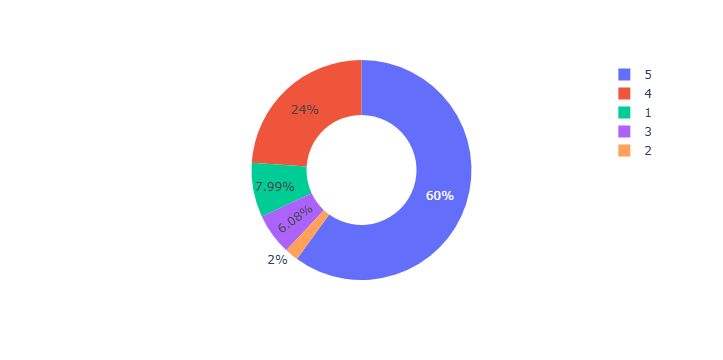

In [28]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px 
figure = px.pie(data, values=quantity, names=numbers,hole=0.5)
figure.show()

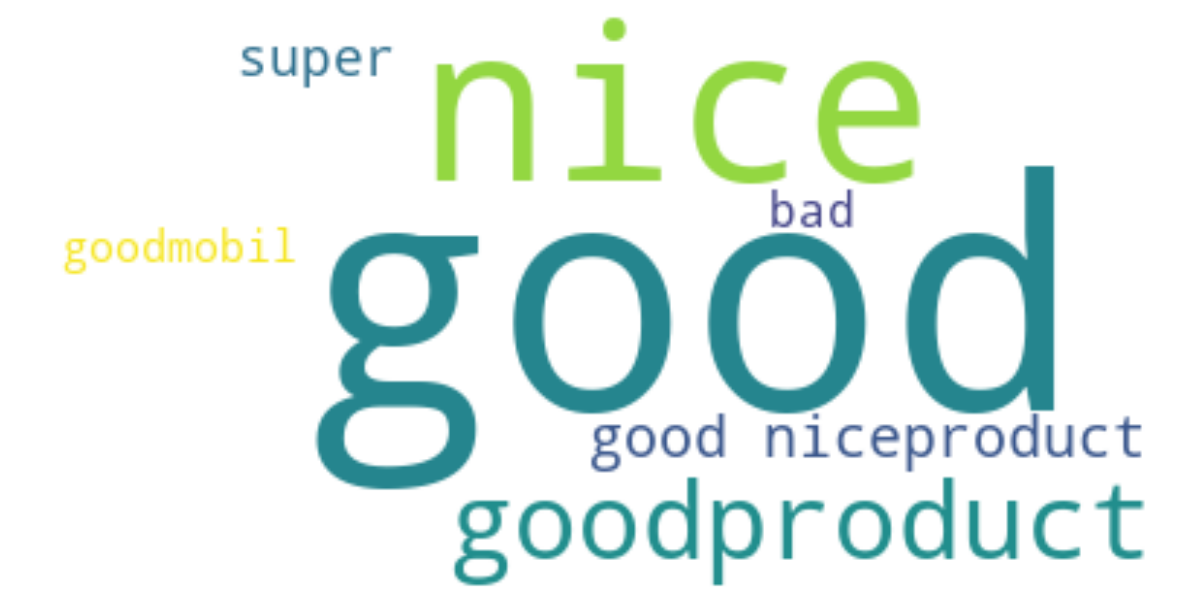

In [29]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())
                    
                    

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


                                              Review  Positive  Negative  \
0  bestgreatperformanceigotaroundbackupbitlowthan...       0.0       0.0   
1                                         goodperfom       0.0       0.0   
2  greatperformusualalsogamelaptopissubatteristan...       0.0       0.0   
3                            wifehappibestproduct👌🏻😘       0.0       0.0   
4    lightweightlaptopnewamazfeaturbatterilifeawesom       0.0       0.0   

   Neutral  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0  


In [32]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("Positive")

    elif(b>a) and (b>c):
        print("Negative")

    else:
        print("Neutral")


sentiment_score(x,y,z)


Neutral


In [33]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  154.0
Negative:  5.0
Neutral:  2145.0
